<a href="https://colab.research.google.com/github/ppn101/Projects/blob/main/Titanic_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [182]:
#Importing all the dependencies required for the project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [183]:
#Importing the csv file and storing it as a dataframe for further analysis
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/train.csv")

In [184]:
#Returning the first 3 rows in the dataframe
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [185]:
#Getting information on the number of columns and rows in the dataframe
df.shape

(891, 12)

In [186]:
#Getting information on the data types of the columns in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [187]:
#Checking the count of null values in the dataframe
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [188]:
#Since most of the data is missing from the cabin column, hence i will be dropping that column
df.drop('Cabin', axis = 1, inplace = True)
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S


In [189]:
#Getting information on the average age of all the passengers present in the dataframe
mean_age = round(df["Age"].mean(),2)
print(mean_age)

29.7


In [190]:
#Filling the null values in the age column with the average age of the entire column
df['Age'] = df['Age'].fillna(value = mean_age)

In [191]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [192]:
#Getting categorical count of values in the embarked dataframe
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [193]:
#Updating the null values in the embarked column with the mode value of the entire column in the dataframe
df['Embarked'] = df['Embarked'].fillna(value = 'S')

In [194]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [195]:
#Getting a statistical summary of the entire dataframe
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699293,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.700000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [197]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

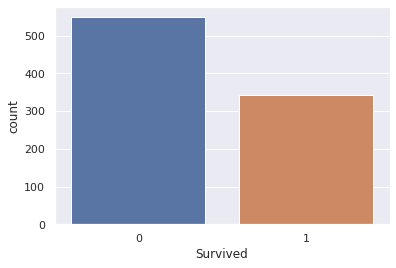

In [198]:
#Creating a bar graph for the data in the 'survived' column in the dataframe
sns.countplot(x = 'Survived', data = df) 

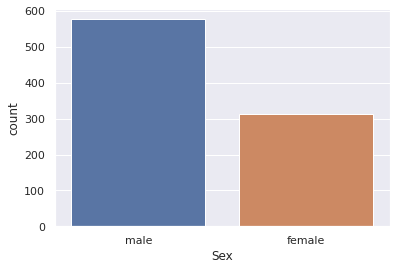

In [199]:
#Creating a bar graph for the data in the 'sex' column in the dataframe
sns.countplot(x = 'Sex', data = df) 

(0.0, 891.0)

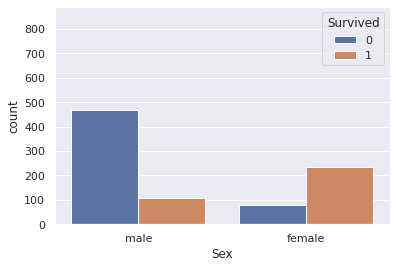

In [200]:
#Creating a bar graph for the data in the 'sex' column with True(Green Flag) for the 'survived' column in the dataframe
sns.countplot(x = 'Sex', hue = 'Survived', data = df)
plt.ylim(0, df.shape[0])

In [201]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

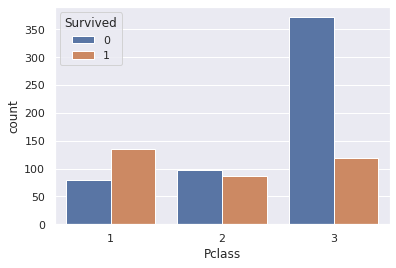

In [202]:
#Creating a bar graph for the data in the 'Pclass' column with True(Green Flag) for the 'survived' column in the dataframe
sns.countplot(x = 'Pclass', hue = 'Survived', data = df)

In [203]:
df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

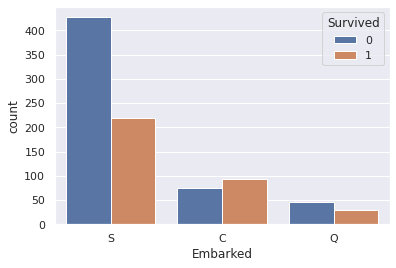

In [204]:
#Creating a bar graph for the data in the 'Embarked' column with True(Green Flag) for the 'survived' column in the dataframe
sns.countplot(x = 'Embarked', hue = 'Survived', data = df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


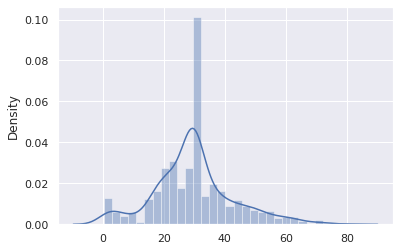

In [205]:
#Creating a histogram for the values in the 'Age' column of the dataframe
sns.distplot(x = df['Age'])

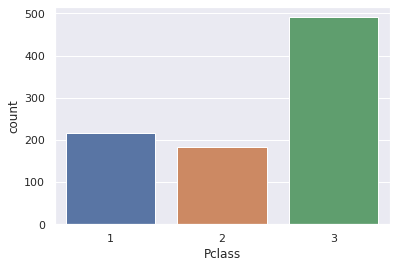

In [206]:
#Creating a bar graph for the values in the 'Pclass' column of the dataframe
sns.countplot(x = 'Pclass', data = df)

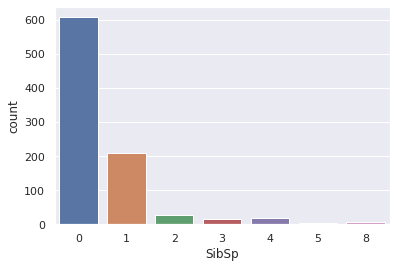

In [207]:
#Creating a bar graph for the values in the 'SibSp' column of the dataframe
sns.countplot(x = 'SibSp', data = df)

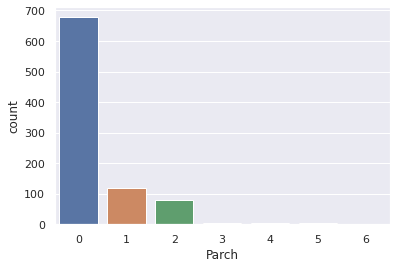

In [208]:
#Creating a bar graph for the values in the 'Parch' column of the dataframe
sns.countplot(x = 'Parch', data = df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


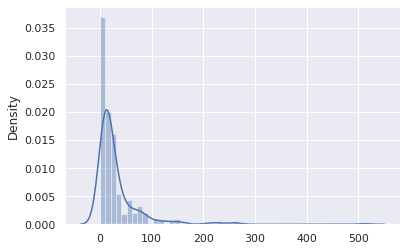

In [209]:
#Creating a histogram for the values in the 'Fare' column of the dataframe
sns.distplot(x = df['Fare'])

In [211]:
#Removing the 'Name' column from the original dataframe
df.drop('Name', axis = 1, inplace = True)

In [212]:
#Removing the 'Ticket' column from the original dataframe
df.drop('Ticket', axis = 1, inplace = True)

In [214]:
#Since Categorical data cannot be fed into the model hence, converting the categorical data into numerical data
encoder = LabelEncoder()

In [215]:
#Performing label encoding on 'Sex' and 'Embarked' columns in the dataframe
df["Sex"] = encoder.fit_transform(df["Sex"])
df["Embarked"] = encoder.fit_transform(df["Embarked"])

In [217]:
#Creating a label dataframe with only the target variable
label = df["Survived"]

In [226]:
#Creating a features dataframe with only the feature data and removing the label data from it
features = df.drop(columns = ["Survived", 'PassengerId'], axis = 1)

In [227]:
label.shape

(891,)

In [220]:
features.shape

(891, 7)

In [221]:
#Splitting the entire dataframe into training and test dataframes respectively
features_train, features_test, label_train, label_test = train_test_split(features, label, test_size= 0.2, random_state = 1, stratify = label)

In [222]:
print(features_train.shape)
print(features_test.shape)
print(label_train.shape)
print(label_test.shape)

(712, 7)
(179, 7)
(712,)
(179,)


In [223]:
#Selecting the type of model for performning analysis and training it
model = LogisticRegression()
model.fit(features_train, label_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [224]:
#Calculating the model accuracy on training data
predict_train = model.predict(features_train)
accuracy_train = accuracy_score(label_train, predict_train)
print(round(accuracy_train,2)*100)

80.0


In [225]:
#Calculating the model accuracy on test data
predict_test = model.predict(features_test)
accuracy_test = accuracy_score(label_test, predict_test)
print(round(accuracy_test,2)*100)

79.0
